In [1]:
#########################################################################################
#   Nombre del programa: Cálculo de la radiación solar en la atmósfera en onda corta    #
#   Carlos Genes, Luis Miguel Patiño, Jose Sebastian Molina                             #
#########################################################################################
from numpy import arcsin, sin, cos, pi, exp
import numpy as np
from tabulate import tabulate

def radiacion_solar_extraterrestre(dia_juliano, gamma): # Algoritmo para hallar la radiación solar extraterrestre en W/m^2
    s0 = 1340.60 # Constante solar para onda corta en unidades de W/m²
    B = lambda d: (2*pi*d)/365
    f = 1.00011 + 0.034221*cos(B(dia_juliano)) + 0.00128*sin(B(dia_juliano)) + 0.000719*cos(2*B(dia_juliano)) + 0.000077*sin(2*B(dia_juliano))
    return s0*f*cos(gamma)

def radiacion_solar(alpha, theta, J_0, z): # Algoritmo para hallar radiación solar espectral en onda corta (W/m^2)
    mr = 1/cos(theta) # Masa relativa
    return J_0*exp(-alpha*mr*(50000-z))

altura = np.flip(np.array([0, 2000, 4000, 6000, 8000, 10000, 20000, 30000, 40000, 50000])) # Alturas en (m)
alpha = 1.3*10**(-5) # Coeficiente volumétrico de extinción (m^-1)
angulo = 55 # Ángulo de incidencia (grados)
dia_juliano = 14 # Dia juliano

J_0 = radiacion_solar_extraterrestre(dia_juliano, (angulo)*(pi/180))
J_Z = radiacion_solar(alpha, (angulo)*(pi/180), J_0, altura)
transmt = (J_Z/J_0)*100

print(f"Ángulo de incidencia (relativo al zenith): {angulo}°")
print(f"Día Juliano: {dia_juliano}")
print(" ")
print(f"*** RESULTADOS ***")
print(f"Radiación solar extraterrestre: {J_0:.3f} W/m^2")

# Tabla de valores de: Altura (m) vs Radiación Solar Espectral (W/m²) onda corta:
tabla = {"Altura (m)": altura, "Radiación Solar Espectral [W/m² en Onda Corta 0.3µm-2.5µm]": J_Z, "Transmitancia (%)": transmt}
print(tabulate(tabla, headers="keys", tablefmt="psql"))

Ángulo de incidencia (relativo al zenith): 55°
Día Juliano: 14
 
*** RESULTADOS ***
Radiación solar extraterrestre: 795.327 W/m^2
+--------------+--------------------------------------------------------------+---------------------+
|   Altura (m) |   Radiación Solar Espectral [W/m² en Onda Corta 0.3µm-2.5µm] |   Transmitancia (%) |
|--------------+--------------------------------------------------------------+---------------------|
|        50000 |                                                      795.327 |            100      |
|        40000 |                                                      634.035 |             79.7201 |
|        30000 |                                                      505.454 |             63.553  |
|        20000 |                                                      402.948 |             50.6645 |
|        10000 |                                                      321.231 |             40.3898 |
|         8000 |                                      

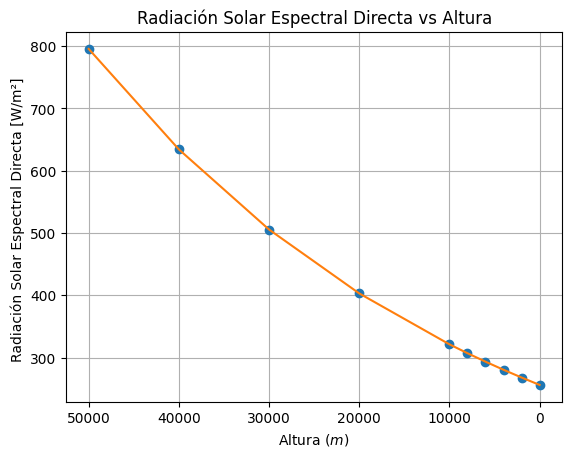

In [2]:
import matplotlib.pyplot as plt  # Herramienta para realizar gráficas
fig, ax = plt.subplots()
plt.xlabel(r'Altura ($m$)')
plt.ylabel(r'Radiación Solar Espectral Directa [W/m²] ')
plt.title(r'Radiación Solar Espectral Directa vs Altura')
plt.grid()
ax.plot(altura, J_Z, "o")
ax.plot(altura, J_Z)
ax.invert_xaxis()
plt.savefig('J_Z.pdf')
plt.show()


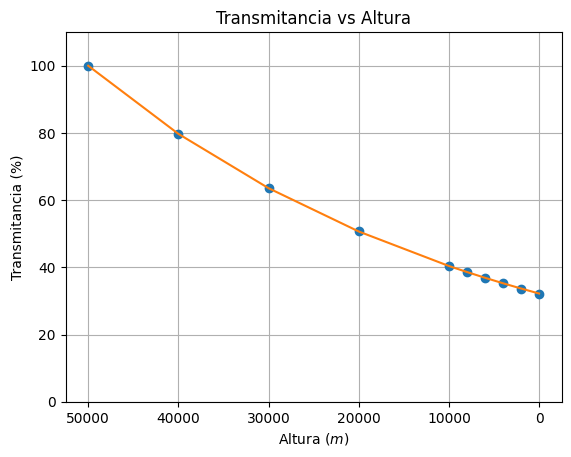

In [3]:
fig, ax = plt.subplots()
plt.xlabel(r'Altura ($m$)')
plt.ylabel(r'Transmitancia (%)')
plt.title(r'Transmitancia vs Altura')
plt.grid()

plt.ylim([0,110])
ax.plot(altura, transmt, "o")
ax.plot(altura, transmt)
ax.invert_xaxis()

plt.savefig('transmitancia.pdf')
plt.show()
